<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

## Preferential_attachment Feature for followers

In [5]:
#for train dataset
nfs=np.array(df_final_train['num_followers_s'])
nfd=np.array(df_final_train['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followers']= preferential_followers
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,1.545059e-13,8.108366e-13,1.719700e-14,-1.355367e-12,4.675312e-13,1.128588e-06,6.616447e-14,9.771077e-13,4.159880e-14,66
1,628879,858706,1,0,0.000000,0.000000,0.000000,2,5,4,...,6.785700e-14,2.732176e-10,1.490197e-16,-3.388579e-16,5.614526e-13,5.465588e-13,3.031059e-15,1.805674e-13,3.030794e-18,10
2,231222,270635,1,0,0.000000,0.000000,0.000000,88,9,88,...,2.276401e-11,2.735460e-11,1.051733e-12,-1.909268e-12,7.536575e-13,6.586794e-07,2.142341e-13,1.299106e-12,2.537238e-14,792
3,1445857,1277246,1,0,0.142857,0.094491,0.320256,7,4,13,...,8.442373e-14,1.054643e-13,2.223069e-16,-3.979668e-15,5.955492e-13,3.342248e-13,7.308505e-14,3.043095e-13,3.050684e-17,28
4,640756,1813874,1,0,0.000000,0.002170,0.000000,12,133,95,...,2.001860e-11,5.592675e-10,2.956967e-12,1.243486e-09,-8.690436e-10,8.054809e-02,3.345821e-10,6.887865e-10,4.183836e-11,1596


In [6]:
#for test dataset
nfs=np.array(df_final_test['num_followers_s'])
nfd=np.array(df_final_test['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followers']= preferential_followers
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,2.701537e-12,4.341619e-13,5.535494e-14,-9.994076e-10,5.791913e-10,3.512357e-07,2.486658e-09,2.771145e-09,1.727564e-12,84
1,819119,1437161,1,0,0.034483,0.051110,0.098058,5,35,4,...,1.532069e-09,6.315502e-12,8.646475e-11,-1.176043e-11,5.985308e-11,5.767287e-10,2.145986e-08,6.276104e-10,1.064631e-10,175
2,1593038,1192744,1,0,0.269231,0.124784,0.449977,18,17,11,...,4.758619e-13,3.306008e-12,3.072286e-13,-8.276594e-13,3.945479e-13,4.041333e-07,1.031985e-13,6.014756e-13,3.508375e-14,306
3,1180660,713175,1,0,0.006452,0.000000,0.024056,20,5,144,...,1.338966e-12,1.974747e-09,3.523818e-14,-1.079379e-13,4.482477e-13,5.477914e-13,7.930355e-15,3.025824e-11,1.855408e-16,100
4,1350443,1172562,1,0,0.000000,0.000000,0.000000,3,3,2,...,3.541797e-16,1.088530e-15,4.423468e-18,-9.049237e-17,1.289442e-13,5.286703e-15,4.544559e-18,1.731492e-17,6.274625e-20,9


## Preferential_attachment Feature for followees

In [7]:
#for train dataset
nfs=np.array(df_final_train['num_followees_s'])
nfd=np.array(df_final_train['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followees']= preferential_followees
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,8.108366e-13,1.719700e-14,-1.355367e-12,4.675312e-13,1.128588e-06,6.616447e-14,9.771077e-13,4.159880e-14,66,120
1,628879,858706,1,0,0.000000,0.000000,0.000000,2,5,4,...,2.732176e-10,1.490197e-16,-3.388579e-16,5.614526e-13,5.465588e-13,3.031059e-15,1.805674e-13,3.030794e-18,10,8
2,231222,270635,1,0,0.000000,0.000000,0.000000,88,9,88,...,2.735460e-11,1.051733e-12,-1.909268e-12,7.536575e-13,6.586794e-07,2.142341e-13,1.299106e-12,2.537238e-14,792,792
3,1445857,1277246,1,0,0.142857,0.094491,0.320256,7,4,13,...,1.054643e-13,2.223069e-16,-3.979668e-15,5.955492e-13,3.342248e-13,7.308505e-14,3.043095e-13,3.050684e-17,28,39
4,640756,1813874,1,0,0.000000,0.002170,0.000000,12,133,95,...,5.592675e-10,2.956967e-12,1.243486e-09,-8.690436e-10,8.054809e-02,3.345821e-10,6.887865e-10,4.183836e-11,1596,285


In [8]:
#for test dataset
nfs=np.array(df_final_test['num_followees_s'])
nfd=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followees']= preferential_followees
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,4.341619e-13,5.535494e-14,-9.994076e-10,5.791913e-10,3.512357e-07,2.486658e-09,2.771145e-09,1.727564e-12,84,54
1,819119,1437161,1,0,0.034483,0.051110,0.098058,5,35,4,...,6.315502e-12,8.646475e-11,-1.176043e-11,5.985308e-11,5.767287e-10,2.145986e-08,6.276104e-10,1.064631e-10,175,104
2,1593038,1192744,1,0,0.269231,0.124784,0.449977,18,17,11,...,3.306008e-12,3.072286e-13,-8.276594e-13,3.945479e-13,4.041333e-07,1.031985e-13,6.014756e-13,3.508375e-14,306,242
3,1180660,713175,1,0,0.006452,0.000000,0.024056,20,5,144,...,1.974747e-09,3.523818e-14,-1.079379e-13,4.482477e-13,5.477914e-13,7.930355e-15,3.025824e-11,1.855408e-16,100,1728
4,1350443,1172562,1,0,0.000000,0.000000,0.000000,3,3,2,...,1.088530e-15,4.423468e-18,-9.049237e-17,1.289442e-13,5.286703e-15,4.544559e-18,1.731492e-17,6.274625e-20,9,10


In [10]:
if not os.path.isfile('storage_sample_stage5.h5'):
    hdf = HDFStore('storage_sample_stage5.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage5.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage5.h5', 'test_df',mode='r')

In [12]:
print(df_final_train.columns)
print(len(df_final_train.columns))

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'prefer_Attach_followers', 'prefer_Attach_followees'],
      dtype='object')
57


## svd_dot Feature 
#### svd_dot is Dot product between sourse node svd and destination node svd features

In [13]:
#for train datasets
s1,s2,s3,s4,s5,s6=df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']

In [14]:
svd_dot_u=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]

    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    
    svd_dot_u.append(np.dot(a,b))
df_final_train['svd_dot_u']=svd_dot_u

In [15]:
svd_dot_v=[]
for i in range(len(np.array(s7))):
    c=[]
    d=[]
    
    c.append(np.array(s7[i]))
    c.append(np.array(s8[i]))
    c.append(np.array(s9[i]))
    c.append(np.array(s10[i]))
    c.append(np.array(s11[i]))
    c.append(np.array(s12[i]))
   
    d.append(np.array(d7[i]))
    d.append(np.array(d8[i]))
    d.append(np.array(d9[i]))
    d.append(np.array(d10[i]))
    d.append(np.array(d11[i]))
    d.append(np.array(d12[i]))
    
    svd_dot_v.append(np.dot(c,d))    
df_final_train['svd_dot_v']=svd_dot_v

In [17]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees,svd_dot_u,svd_dot_v
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,-1.355367e-12,4.675312e-13,1.128588e-06,6.616447e-14,9.771077e-13,4.159880e-14,66,120,1.114954e-11,2.238781e-12
1,628879,858706,1,0,0.000000,0.000000,0.000000,2,5,4,...,-3.388579e-16,5.614526e-13,5.465588e-13,3.031059e-15,1.805674e-13,3.030794e-18,10,8,5.598729e-26,4.975653e-23
2,231222,270635,1,0,0.000000,0.000000,0.000000,88,9,88,...,-1.909268e-12,7.536575e-13,6.586794e-07,2.142341e-13,1.299106e-12,2.537238e-14,792,792,1.009219e-11,2.026743e-11
3,1445857,1277246,1,0,0.142857,0.094491,0.320256,7,4,13,...,-3.979668e-15,5.955492e-13,3.342248e-13,7.308505e-14,3.043095e-13,3.050684e-17,28,39,1.435855e-24,2.266845e-24
4,640756,1813874,1,0,0.000000,0.002170,0.000000,12,133,95,...,1.243486e-09,-8.690436e-10,8.054809e-02,3.345821e-10,6.887865e-10,4.183836e-11,1596,285,3.662365e-07,3.153360e-04


In [16]:
#for test dataset
s1,s2,s3,s4,s5,s6=df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']

In [18]:
svd_dot_u=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]

    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    
    svd_dot_u.append(np.dot(a,b))
df_final_test['svd_dot_u']=svd_dot_u

In [19]:
svd_dot_v=[]
for i in range(len(np.array(s7))):
    c=[]
    d=[]
    
    c.append(np.array(s7[i]))
    c.append(np.array(s8[i]))
    c.append(np.array(s9[i]))
    c.append(np.array(s10[i]))
    c.append(np.array(s11[i]))
    c.append(np.array(s12[i]))
   
    d.append(np.array(d7[i]))
    d.append(np.array(d8[i]))
    d.append(np.array(d9[i]))
    d.append(np.array(d10[i]))
    d.append(np.array(d11[i]))
    d.append(np.array(d12[i]))
    svd_dot_v.append(np.dot(c,d))
    
df_final_test['svd_dot_v']=svd_dot_v

In [20]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees,svd_dot_u,svd_dot_v
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,-9.994076e-10,5.791913e-10,3.512357e-07,2.486658e-09,2.771145e-09,1.727564e-12,84,54,8.425199e-20,2.074810e-17
1,819119,1437161,1,0,0.034483,0.051110,0.098058,5,35,4,...,-1.176043e-11,5.985308e-11,5.767287e-10,2.145986e-08,6.276104e-10,1.064631e-10,175,104,1.162202e-18,3.295557e-17
2,1593038,1192744,1,0,0.269231,0.124784,0.449977,18,17,11,...,-8.276594e-13,3.945479e-13,4.041333e-07,1.031985e-13,6.014756e-13,3.508375e-14,306,242,2.214241e-13,9.063845e-13
3,1180660,713175,1,0,0.006452,0.000000,0.024056,20,5,144,...,-1.079379e-13,4.482477e-13,5.477914e-13,7.930355e-15,3.025824e-11,1.855408e-16,100,1728,8.907890e-15,6.059990e-20
4,1350443,1172562,1,0,0.000000,0.000000,0.000000,3,3,2,...,-9.049237e-17,1.289442e-13,5.286703e-15,4.544559e-18,1.731492e-17,6.274625e-20,9,10,1.602594e-27,3.396059e-26


In [22]:
hdf = HDFStore('storage_sample_stage6.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

## Modeling 

In [24]:
print(df_final_train.shape)
print(df_final_test.shape)
print(df_final_test.columns)

(100001, 59)
(50001, 59)
Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'prefer_Attach_followers', 'prefer_Attach_followees', 'svd_dot_u',
      

In [25]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [26]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [27]:
print(df_final_train.shape)
print(df_final_test.shape)

(100001, 56)
(50001, 56)


### Random Forest Model 

Estimators =  10 Train Score 0.9125671635550167 test Score 0.8856584204709683
Estimators =  50 Train Score 0.9201432520733853 test Score 0.9016778452489262
Estimators =  100 Train Score 0.9221473001934034 test Score 0.9105257634589149
Estimators =  250 Train Score 0.9217145548751765 test Score 0.9117850771329625
Estimators =  450 Train Score 0.9222911804414489 test Score 0.9123646436665828


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

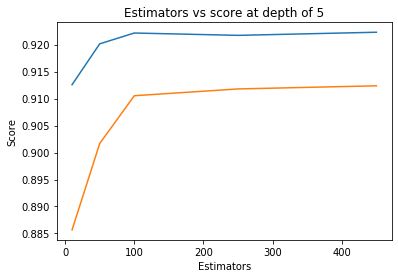

In [61]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8956640555735191 test Score 0.8658235394311019
depth =  9 Train Score 0.9572044901547836 test Score 0.9178085083922727
depth =  11 Train Score 0.961705503626026 test Score 0.9240737246021261
depth =  15 Train Score 0.9643801081608587 test Score 0.9249653783205338
depth =  20 Train Score 0.9638750216058483 test Score 0.9241431451612904
depth =  35 Train Score 0.9640862905440454 test Score 0.9244050494654372
depth =  50 Train Score 0.9640862905440454 test Score 0.9244050494654372
depth =  70 Train Score 0.9640862905440454 test Score 0.9244050494654372
depth =  130 Train Score 0.9640862905440454 test Score 0.9244050494654372


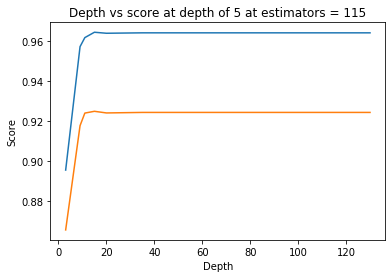

In [62]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [63]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(70,125),
              "max_depth": sp_randint(3,18),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.93778768 0.9591602  0.9604556  0.95973976 0.93946592]
mean train scores [0.93800534 0.95987683 0.96157692 0.96027162 0.93975931]


In [64]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=56, min_samples_split=179,
                       min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [69]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [70]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [71]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9643406117982389
Test f1 score 0.9188184084858217


In [68]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


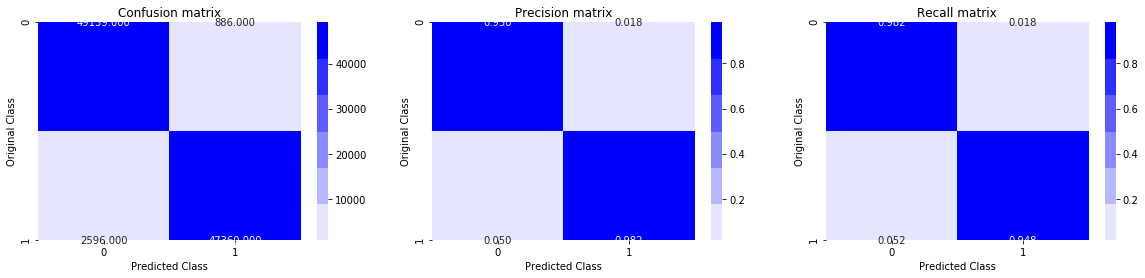

Test confusion_matrix


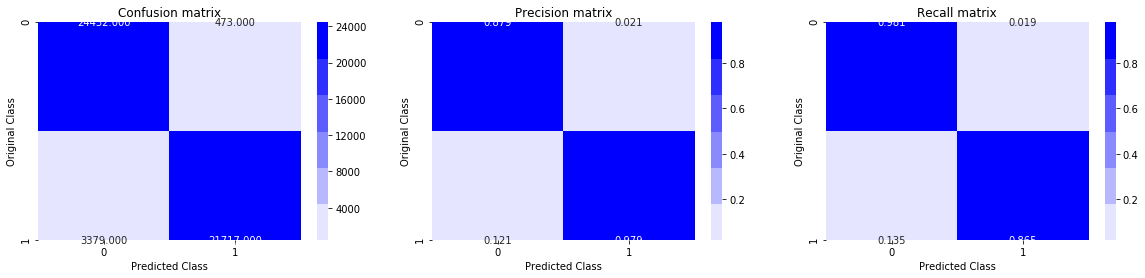

In [37]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

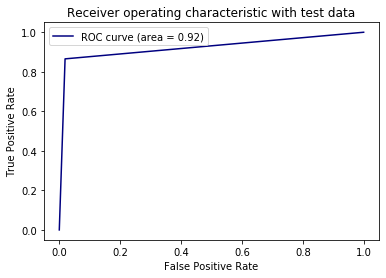

In [38]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

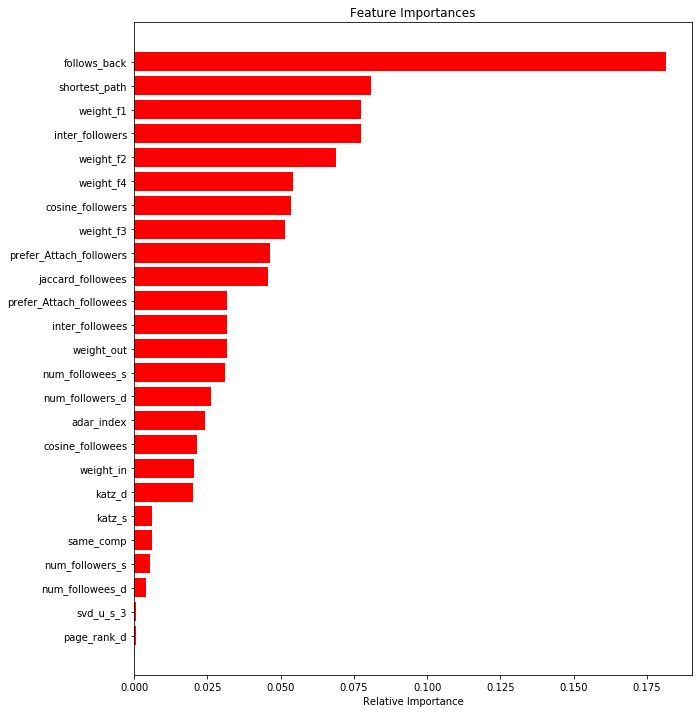

In [39]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBoost Model 

Estimators =  10 Train Score 0.9308368685741019 test Score 0.9262258496461138
Estimators =  50 Train Score 0.9737833051761688 test Score 0.9308138921144304
Estimators =  100 Train Score 0.9776440066480199 test Score 0.928811126822988
Estimators =  250 Train Score 0.9867015917791658 test Score 0.926200901072403
Estimators =  450 Train Score 0.9944120627213354 test Score 0.922270111891972


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

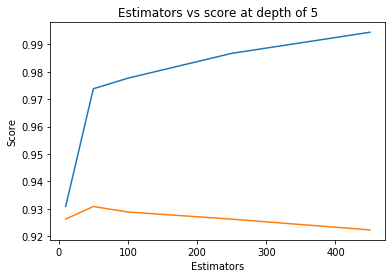

In [49]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=i, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9656810982048574 test Score 0.923206395960446
depth =  9 Train Score 0.9800449292667625 test Score 0.9276953281682112
depth =  11 Train Score 0.9855575979154463 test Score 0.9273061250343094
depth =  15 Train Score 0.9964054059481495 test Score 0.9304450338933098
depth =  20 Train Score 0.9998798919027124 test Score 0.9277906731377928
depth =  35 Train Score 0.9999399471534951 test Score 0.9318568636927149
depth =  50 Train Score 0.9999399471534951 test Score 0.9318568636927149
depth =  70 Train Score 0.9999399471534951 test Score 0.9318568636927149
depth =  130 Train Score 0.9999399471534951 test Score 0.9318568636927149


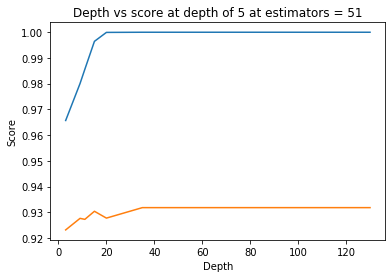

In [52]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=i, min_child_weight=1, missing=None,
       n_estimators=51, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 51')
plt.show()

In [53]:
import xgboost as xgb
clf = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(15,75),
              "max_depth": sp_randint(6,18)
              }
model = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25,return_train_score=True)


model.fit(df_final_train,y_train)
print('mean test scores',model.cv_results_['mean_test_score'])
print('mean train scores',model.cv_results_['mean_train_score'])

mean test scores [0.9762966  0.97693264 0.97423201 0.97632381 0.97507802]
mean train scores [0.98307821 0.98918456 0.97619642 0.98301648 0.98101899]


In [54]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=38, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [55]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=12, min_child_weight=1, missing=None,
       n_estimators=38, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [56]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [57]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9873522494423078
Test f1 score 0.931689563040414


Train confusion_matrix


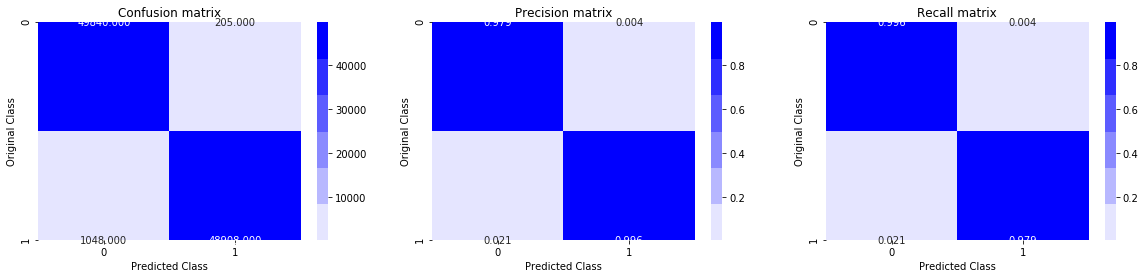

Test confusion_matrix


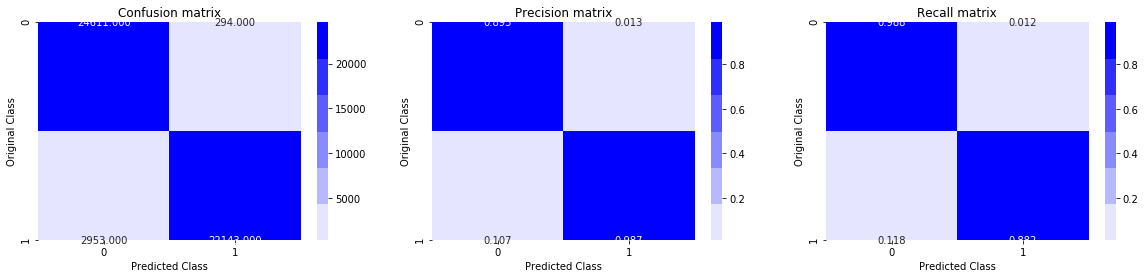

In [58]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

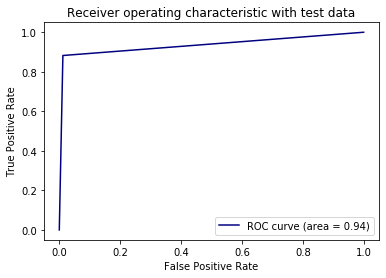

In [59]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

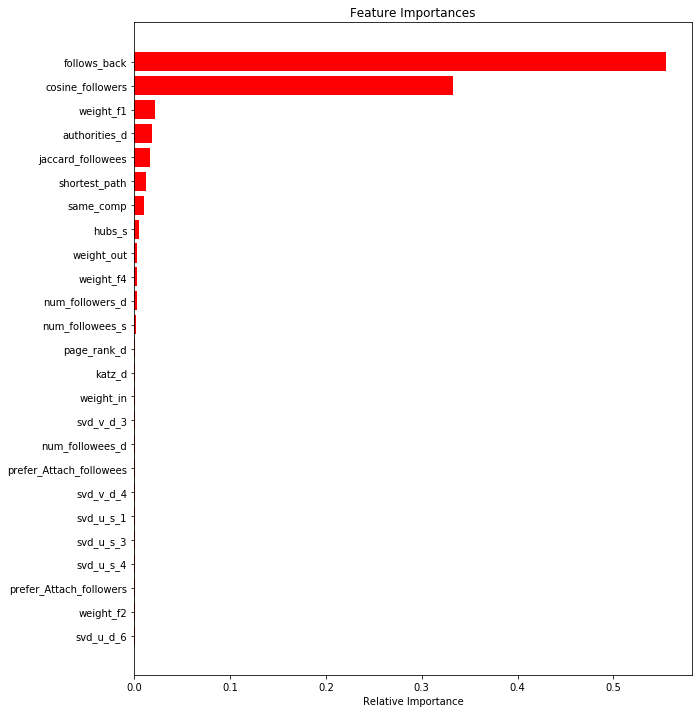

In [60]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Prettytable 

In [73]:
from prettytable import PrettyTable 
ptable = PrettyTable()
ptable.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
ptable.add_row(['Random Forest','71','12','0.9643','0.9188'])
ptable.add_row(['XGBOOST','38','12','0.9873','0.9316'])
print(ptable)

+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |      71      |     12    |     0.9643     |     0.9188    |
|    XGBOOST    |      38      |     12    |     0.9873     |     0.9316    |
+---------------+--------------+-----------+----------------+---------------+


### Conclusions 

1. We have added Preferential Attachment and svd dot features in our dataset.
2. follows_back feature is most important feature in both models.
3. Preferential attachment feature is important in Ransom forest model but svd dot feature is not important.
4. In XGBoost model, both preferential attachment and svd dot features are not important.
5. Test f1-score of XGBoost model is better than Random Forest model.